# 1. Imports

In [488]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# from statsmodels.api import OLS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [489]:
SEED = 7331

np.random.seed(SEED)

# 2. Breast Cancer Wisconsin (Diagnostic) dataset


In [490]:
df = pd.read_csv("data/wdbc.data", sep=",", header=None)
df = df.sample(frac=1).reset_index(drop=True)
df


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,857155,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,...,13.76,20.70,89.88,582.6,0.1494,0.21560,0.305000,0.065480,0.2747,0.08301
1,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.001860,0.002924,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
2,889719,M,17.19,22.07,111.60,928.3,0.09726,0.08995,0.090610,0.065270,...,21.58,29.33,140.50,1436.0,0.1558,0.25670,0.388900,0.198400,0.3216,0.07570
3,906564,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.321900,0.110800,0.2827,0.09208
4,859717,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,...,23.32,33.82,151.60,1681.0,0.1585,0.73940,0.656600,0.189900,0.3313,0.13390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,866203,M,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.056270,...,22.32,25.73,148.20,1538.0,0.1021,0.22640,0.320700,0.121800,0.2841,0.06541
565,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,...,30.00,33.62,211.70,2562.0,0.1573,0.60760,0.647600,0.286700,0.2355,0.10510
566,897630,M,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,...,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.463400,0.204800,0.3679,0.09870
567,894089,B,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,...,13.34,19.71,84.48,544.2,0.1104,0.04953,0.019380,0.027840,0.1917,0.06174


In [491]:
df[1].unique()  # target


array(['B', 'M'], dtype=object)

In [492]:
df_len = df.shape[0]
train_size = int(df_len*0.75)

df_train = df.iloc[:train_size, :]
df_test = df.iloc[train_size:, :]

print(df_train.shape)


(426, 32)


From now, we will changing only df_train without df_test because we want to check how models accuracy will change.


In [493]:
x_train = df_train.drop(1, axis=1)
y_train = df_train[1]

x_test = df_test.drop(1, axis=1)
y_test = df_test[1]


### 2.1. Test on Random Forest Classifier without missing values

In [494]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc:", acc)


RandomForestClassifier acc: 0.9790209790209791


### 2.2. Test on Random Forest Classifier with missing values (1%)


In [495]:
df_train_1p = df_train.copy()

for col in df_train_1p.columns:
    df_train_1p.loc[df_train_1p.sample(frac=0.01).index, col] = np.nan

df_train_1p = df_train_1p.dropna()
print(df_train_1p.shape)

x_train_1p = df_train_1p.drop(1, axis=1)
y_train_1p = df_train_1p[1]


(312, 32)


In [496]:
model = RandomForestClassifier()
model.fit(x_train_1p, y_train_1p)

y_pred = model.predict(x_test)

acc_1p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (1%)", acc_1p)


RandomForestClassifier acc: (1%) 0.972027972027972


### 2.3. Test on Random Forest Classifier with missing values (5%)


In [497]:
df_train_5p = df_train.copy()

for col in df_train_5p.columns:
    df_train_5p.loc[df_train_5p.sample(frac=0.05).index, col] = np.nan

df_train_5p = df_train_5p.dropna()
print(df_train_5p.shape)

x_train_5p = df_train_5p.drop(1, axis=1)
y_train_5p = df_train_5p[1]


(87, 32)


In [498]:
model = RandomForestClassifier()
model.fit(x_train_5p, y_train_5p)

y_pred = model.predict(x_test)

acc_5p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (5%)", acc_5p)


RandomForestClassifier acc: (5%) 0.965034965034965


### 2.4. Test on Random Forest Classifier with missing values (10%)


In [499]:
df_train_10p = df_train.copy()

for col in df_train_10p.columns:
    df_train_10p.loc[df_train_10p.sample(frac=0.10).index, col] = np.nan

df_train_10p = df_train_10p.dropna()
print(df_train_10p.shape)

x_train_10p = df_train_10p.drop(1, axis=1)
y_train_10p = df_train_10p[1]


(11, 32)


In [500]:
model = RandomForestClassifier()
model.fit(x_train_10p, y_train_10p)

y_pred = model.predict(x_test)

acc_10p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (10%)", acc_10p)


RandomForestClassifier acc: (10%) 0.9440559440559441


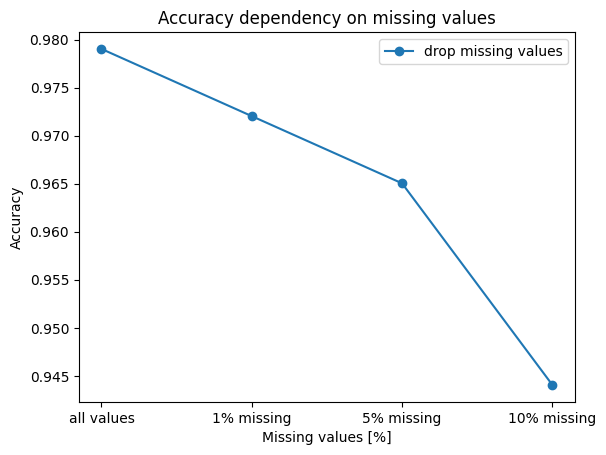

In [501]:
acc_droped = [acc, acc_1p, acc_5p, acc_10p]
x = ["all values", "1% missing", "5% missing", "10% missing"]

plt.plot(x, acc_droped, marker="o", label="drop missing values")

plt.title("Accuracy dependency on missing values")
plt.xlabel("Missing values [%]")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


The graph tells us that the higher the percentage of missing data, the worse the model performs.

This is due to the fact that we have fewer and fewer records to train the model.

### 2.5. Test on Random Forest Classifier with missing values (1%) - replace with mean value


In [502]:
df_train_1p = df_train.copy()

for col in df_train_1p.columns:
    df_train_1p.loc[df_train_1p.sample(frac=0.01).index, col] = np.nan

for column in df_train_1p.columns:
    if pd.api.types.is_numeric_dtype(df_train_1p[column]):
        df_train_1p[column].fillna(df_train_1p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_1p[column].fillna(df_train_1p[column].mode()[0], inplace=True)


In [503]:
model = RandomForestClassifier()
model.fit(x_train_1p, y_train_1p)

y_pred = model.predict(x_test)

acc_1p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (1%)", acc_1p)


RandomForestClassifier acc: (1%) 0.9790209790209791


### 2.6. Test on Random Forest Classifier with missing values (5%) - replace with mean value


In [504]:
df_train_5p = df_train.copy()

for col in df_train_5p.columns:
    df_train_5p.loc[df_train_5p.sample(frac=0.01).index, col] = np.nan

for column in df_train_5p.columns:
    if pd.api.types.is_numeric_dtype(df_train_5p[column]):
        df_train_5p[column].fillna(df_train_5p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_5p[column].fillna(df_train_5p[column].mode()[0], inplace=True)


In [505]:
model = RandomForestClassifier()
model.fit(x_train_5p, y_train_5p)

y_pred = model.predict(x_test)

acc_5p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (5%)", acc_5p)


RandomForestClassifier acc: (5%) 0.965034965034965


### 2.7. Test on Random Forest Classifier with missing values (10%) - replace with mean value


In [506]:
df_train_10p = df_train.copy()

for col in df_train_10p.columns:
    df_train_10p.loc[df_train_10p.sample(frac=0.01).index, col] = np.nan

for column in df_train_10p.columns:
    if pd.api.types.is_numeric_dtype(df_train_10p[column]):
        df_train_10p[column].fillna(df_train_10p[column].mean(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df_train_10p[column].fillna(df_train_10p[column].mode()[0], inplace=True)


In [507]:
model = RandomForestClassifier()
model.fit(x_train_10p, y_train_10p)

y_pred = model.predict(x_test)

acc_10p = accuracy_score(y_test, y_pred)
print("RandomForestClassifier acc: (10%)", acc_10p)


RandomForestClassifier acc: (10%) 0.9300699300699301


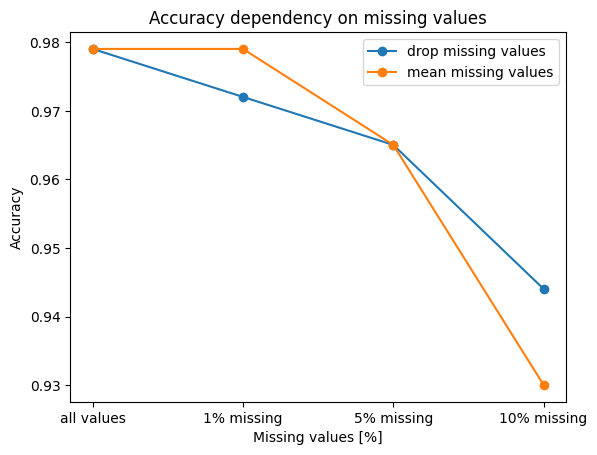

In [508]:
acc_mean = [acc, acc_1p, acc_5p, acc_10p]
x = ["all values", "1% missing", "5% missing", "10% missing"]

plt.plot(x, acc_droped, marker="o", label="drop missing values")
plt.plot(x, acc_mean, marker="o", label="mean missing values")

plt.title("Accuracy dependency on missing values")
plt.xlabel("Missing values [%]")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


As you can see in the chart, regardless of whether we replace the missing values with the average value from the column or delete given records, the effectiveness of the model slightly decreases, although it does not have a significant impact.

Personally, I think that the data is quite simple and hence the impact of missing records on the high performance of the model is small.

I also believe that averaging the result is better than deleting records and should impact the model better.